In [1]:
!pip install -q -U orjson


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


/opt/app-root/lib64/python3.9/site-packages/urllib3/connectionpool.py:1063: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kt2-sd-proj.apps.jary-opea.77qw.p1.openshiftapps.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>


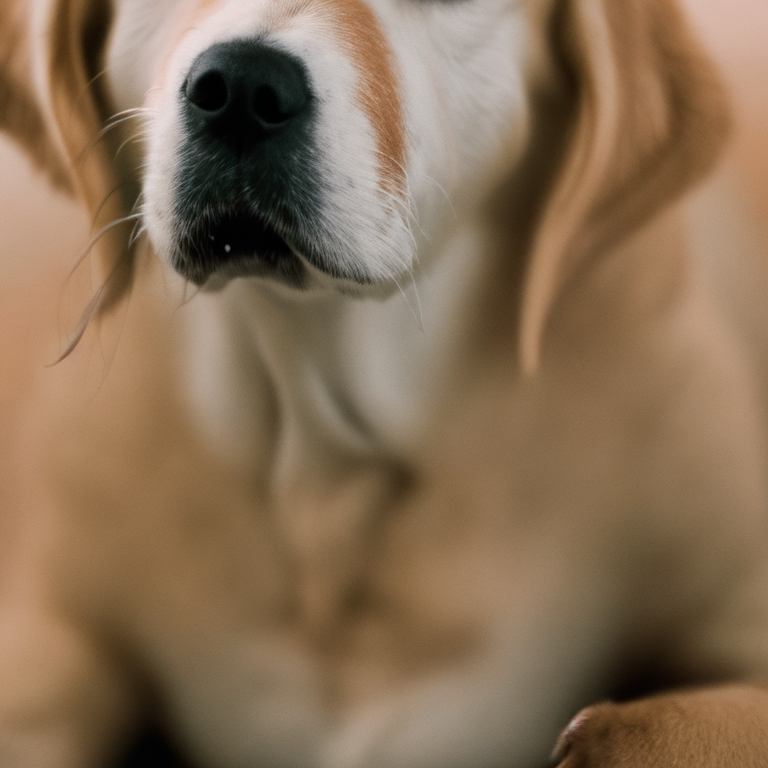

In [9]:
import requests
import orjson
from PIL import Image
import numpy as np

model_endpoint = "https://kt2-sd-proj.apps.jary-opea.77qw.p1.openshiftapps.com/v2/models/stable-diffusion/infer"

# read if token is present or leave ./token.cfg file blank if no token req'd
with open('token.cfg', 'r') as file:
    bearer_token = file.read().replace('\n', '')

head = {"Authorization": 'Bearer {}'.format(bearer_token)} if len(bearer_token) >= 1 else {}
request = {
    "id": "42",
    "inputs": [
        {
            "data": ["Photo of a dog"],
            "datatype": "BYTES",
            "name": "input0",
            "shape": [-1]
        }
    ]
}

response = requests.post(model_endpoint, json=request, headers=head, verify=False)
print(response)
payload = orjson.loads(response.content)

image = Image.fromarray(np.array(payload["outputs"][0]["data"], dtype="uint8"))
image.show()